In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

import pandas as pd
from datetime import datetime

In [2]:
fp = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\UTEA_2022\APP CAÑERO\PROPIEDADES\SHP\30_EL_PAILON_IAG.shp'
data = gpd.read_file(fp)

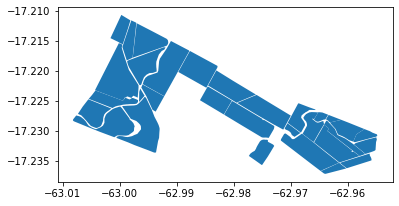

In [3]:
data.plot()
plt.show()

In [4]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich